In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import multiprocessing
import os
from torch import autograd
from fastai.transforms import TfmType
from fasterai.transforms import *
from fastai.conv_learner import *
from fasterai.images import *
from fasterai.dataset import *
from fasterai.visualize import *
from fasterai.callbacks import *
from fasterai.loss import *
from fasterai.modules import *
from fasterai.training import *
from fasterai.generators import *
from fastai.torch_imports import *
from pathlib import Path
from itertools import repeat
import tensorboardX
torch.cuda.set_device(0)
plt.style.use('dark_background')
torch.backends.cudnn.benchmark=True


In [3]:
IMAGENET = Path('data/imagenet/ILSVRC/Data/CLS-LOC/train')
IMAGENET_SMALL = IMAGENET/'n01440764'
proj_id = 'defade2'
TENSORBOARD_PATH = Path('data/tensorboard/' + proj_id)
gpath = IMAGENET.parent/('defade2_gen_64.h5')
default_sz=400
torch.backends.cudnn.benchmark=True

## Training

In [4]:
netG = Unet34(nf_factor=2, self_attention=True, sn=True, leakyReLu=False).cuda()
load_model(netG, gpath)
netG = netG.eval()

In [5]:
x_tfms = []
data_loader = ImageGenDataLoader(sz=256, bs=8, path=IMAGENET_SMALL, random_seed=42, x_noise=False,
            keep_pct=1.0, x_tfms=x_tfms)

md = data_loader.get_model_data()

In [6]:
vis = ModelImageVisualizer(default_sz=default_sz)

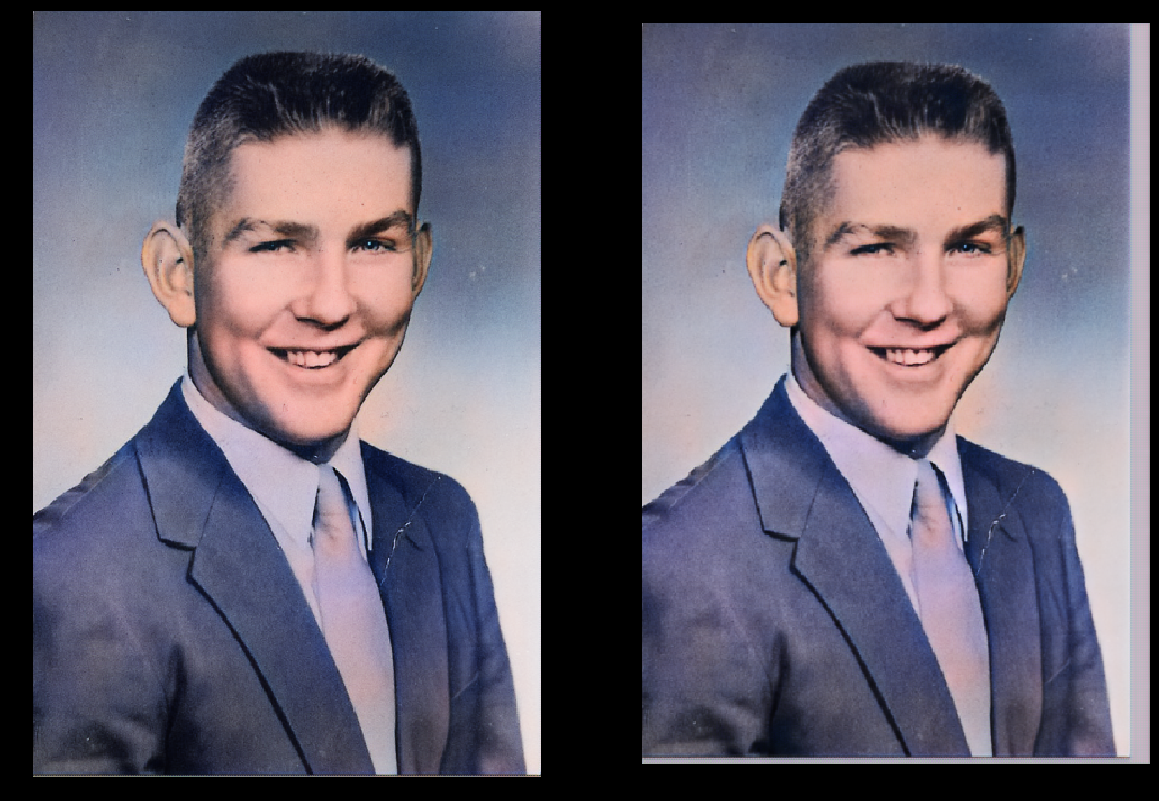

In [7]:
vis.plot_transformed_image("data/uploaded_images/FadedOvermiller.PNG", netG, md.val_ds, tfms=x_tfms)

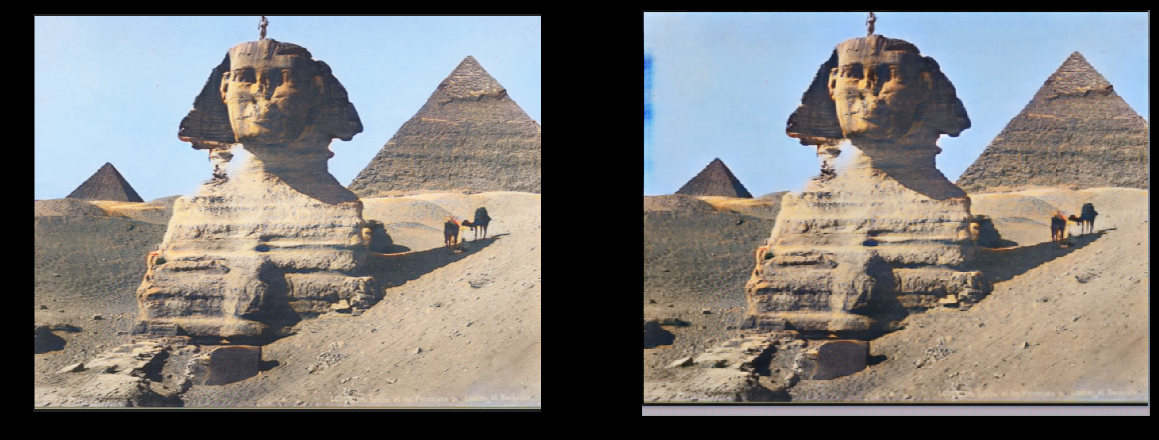

In [8]:
vis.plot_transformed_image("data/uploaded_images/FadedSphynx.PNG", netG, md.val_ds, tfms=x_tfms, sz=500)

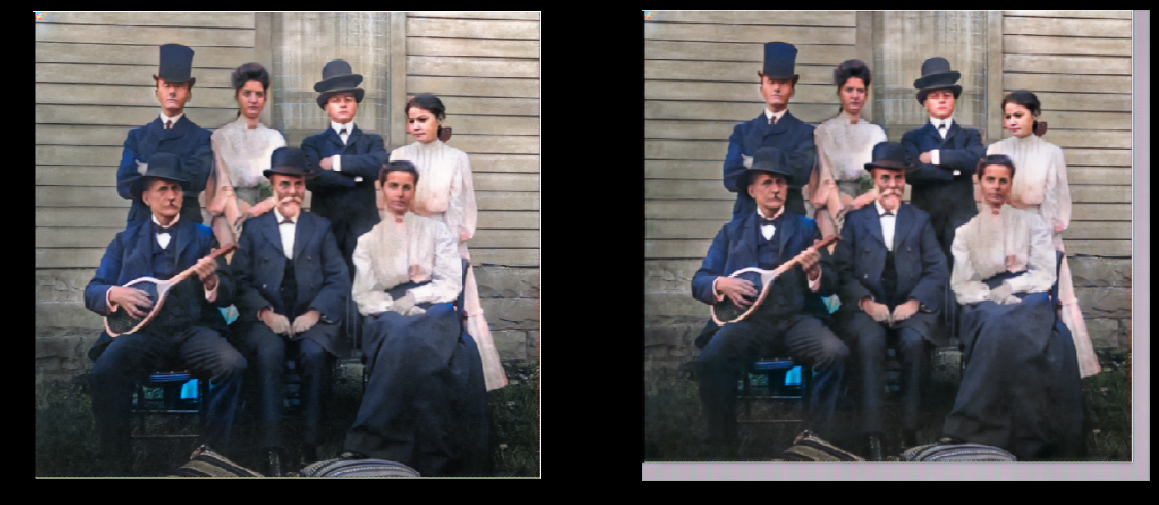

In [9]:
vis.plot_transformed_image("data/uploaded_images/FadedRacket.PNG", netG, md.val_ds, tfms=x_tfms)

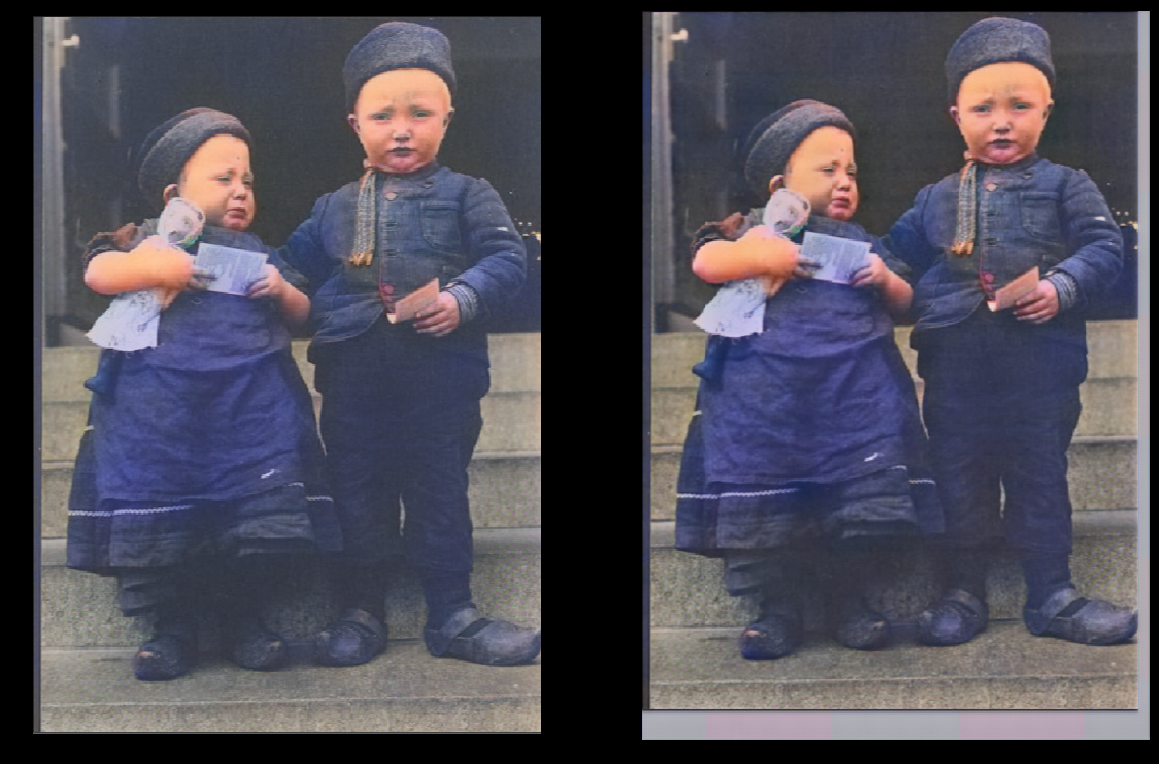

In [10]:
vis.plot_transformed_image("data/uploaded_images/FadedDutchBabies.PNG", netG, md.val_ds, tfms=x_tfms, sz=500)

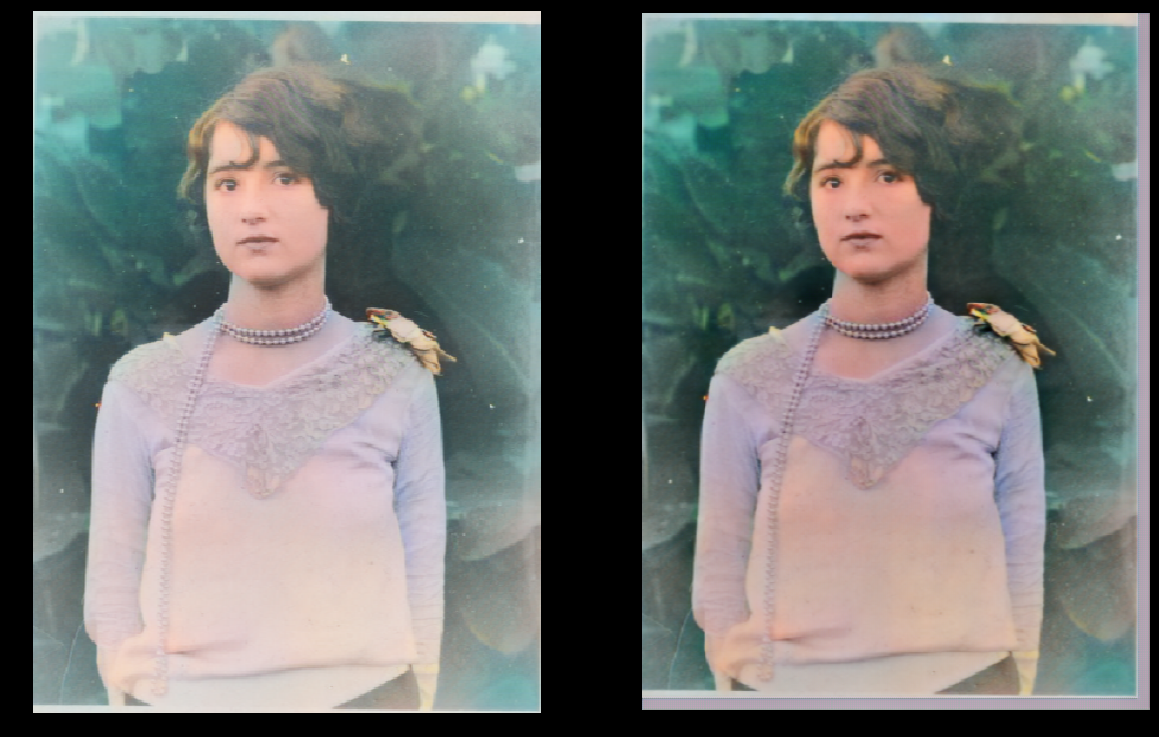

In [11]:
vis.plot_transformed_image("data/uploaded_images/FadedDelores.PNG", netG, md.val_ds, tfms=x_tfms, sz=500)